In [ ]:
pip install statsmodels pandas numpy matplotlib

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.ardl import ARDL

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd




file_path = '/content/drive/My Drive/Crop yield/crop yield project.csv'
data = pd.read_csv(file_path)




print(data.head())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
           Crop  Crop_Year       Season  State     Area  Production  \
0      Arecanut       1997  Whole Year   Assam  73814.0       56708   
1     Arhar/Tur       1997  Kharif       Assam   6637.0        4685   
2   Castor seed       1997  Kharif       Assam    796.0          22   
3      Coconut        1997  Whole Year   Assam  19656.0   126905000   
4  Cotton(lint)       1997  Kharif       Assam   1739.0         794   

   Annual_Rainfall  Fertilizer  Pesticide        Yield  
0           2051.4  7024878.38   22882.34     0.796087  
1           2051.4   631643.29    2057.47     0.710435  
2           2051.4    75755.32     246.76     0.238333  
3           2051.4  1870661.52    6093.36  5238.051739  
4           2051.4   165500.63     539.09     0.420909  
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/dr

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.ardl import ARDL
from google.colab import drive

from google.colab import drive
drive.mount('/content/drive')
import pandas as pd




file_path = '/content/drive/My Drive/Crop yield/crop yield project.csv'
data = pd.read_csv(file_path)




print(data.head())

def adf_test(series):
    result = adfuller(series, autolag='AIC')
    print(f"ADF Statistic: {result[0]}")
    print(f"p-value: {result[1]}")
    if result[1] <= 0.05:
        print("Series is Stationary")
    else:
        print("Series is Non-Stationary")

# Load the data
file_path = '/content/drive/My Drive/Crop yield/crop yield project.csv'  # Update with your file path
data = pd.read_csv(file_path)

# Apply ADF test on each variable
adf_test(data['Production'])
adf_test(data['Annual_Rainfall'])
adf_test(data['Fertilizer'])


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
           Crop  Crop_Year       Season  State     Area  Production  \
0      Arecanut       1997  Whole Year   Assam  73814.0       56708   
1     Arhar/Tur       1997  Kharif       Assam   6637.0        4685   
2   Castor seed       1997  Kharif       Assam    796.0          22   
3      Coconut        1997  Whole Year   Assam  19656.0   126905000   
4  Cotton(lint)       1997  Kharif       Assam   1739.0         794   

   Annual_Rainfall  Fertilizer  Pesticide        Yield  
0           2051.4  7024878.38   22882.34     0.796087  
1           2051.4   631643.29    2057.47     0.710435  
2           2051.4    75755.32     246.76     0.238333  
3           2051.4  1870661.52    6093.36  5238.051739  
4           2051.4   165500.63     539.09     0.420909  
ADF Statistic: -23.054062813465453
p-value: 0.0
Series is Stationary
ADF Statistic: -15.16620101286451

In [ ]:
from statsmodels.tsa.ardl import ARDL

# Define endogenous and exogenous variables
endog = data['Production']  # Dependent variable (Food Supply)
exog_vars = data[['Fertilizer', 'Annual_Rainfall']]  # Exogenous variables as a DataFrame

# Assuming you want lags of 5 for all variables
max_lag = 5

#Instead of order, use lags to specify the maximum lag for all variables
model = ARDL(endog=endog, exog=exog_vars, lags=max_lag)

# Fit the model
result = model.fit()

# Display the model summary
print(result.summary())

                              ARDL Model Results                              
Dep. Variable:             Production   No. Observations:                19689
Model:                  ARDL(5, 0, 0)   Log Likelihood             -409535.021
Method:               Conditional MLE   S.D. of innovations      262704148.944
Date:                Fri, 13 Dec 2024   AIC                         819088.041
Time:                        10:02:04   BIC                         819159.029
Sample:                             5   HQIC                        819111.284
                                19689                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -2.459e+06   3.88e+06     -0.633      0.527   -1.01e+07    5.15e+06
Production.L1         -0.0044      0.007     -0.615      0.538      -0.018       0.010
Production.L2       

In [ ]:
# Long-term relationship
long_term = result.params[1:]

# Short-term dynamics: Error Correction Model (ECM)
# Instead of 'efs', use the following:
ecm = result.resid  # Or result.model.endog - result.fittedvalues
print("Error Correction Model (ECM) dynamics:")
print(ecm)

Error Correction Model (ECM) dynamics:
5       -2.038792e+07
6       -2.033931e+07
7       -2.050801e+07
8       -2.045839e+07
9       -2.109011e+07
             ...     
19684   -1.463475e+07
19685   -1.459797e+07
19686   -1.609852e+07
19687   -1.612941e+07
19688   -1.532525e+07
Length: 19684, dtype: float64


In [ ]:
# Check residuals for autocorrelation
from statsmodels.stats.diagnostic import acorr_ljungbox
ljung_box_test = acorr_ljungbox(result.resid, lags=10)
print(ljung_box_test)


     lb_stat  lb_pvalue
1   0.002977   0.956487
2   0.004207   0.997899
3   0.004733   0.999914
4   0.007612   0.999993
5   0.008920   1.000000
6   0.263345   0.999655
7   0.526417   0.999344
8   0.792942   0.999249
9   1.233138   0.998685
10  1.788722   0.997718


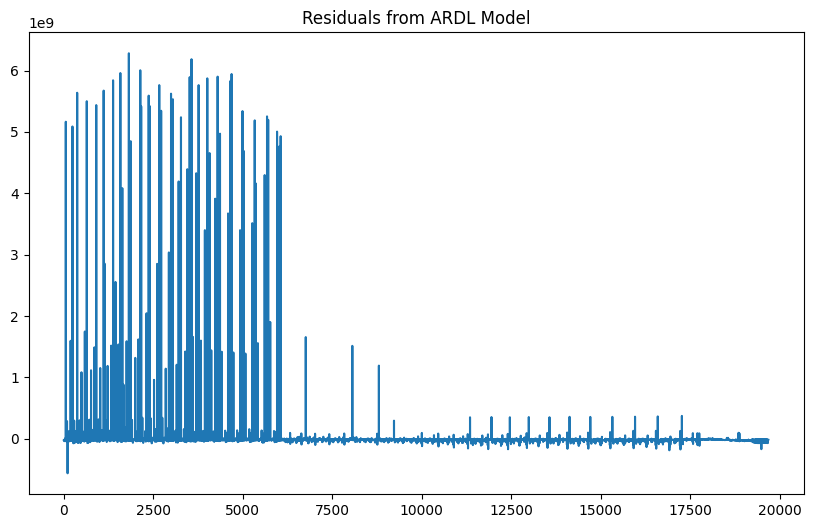

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(result.resid)
plt.title("Residuals from ARDL Model")
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [ ]:
# Assuming 'data' is your DataFrame with 'Production', 'Fertilizer', and 'Annual_Rainfall' columns
X = data[['Fertilizer', 'Annual_Rainfall']]
y = data['Production']

In [ ]:
def calculate_rmse(y_true, y_pred):
  """Calculates the Root Mean Squared Error.

  Args:
    y_true: The true values.
    y_pred: The predicted values.

  Returns:
    The RMSE value.
  """
  return np.sqrt(mean_squared_error(y_true, y_pred))

In [ ]:
ratios = [0.2, 0.3, 0.4, 0.1]  # Train-test split ratios
results = []

for ratio in ratios:
  # Split the data
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1 - ratio, random_state=42)  # You can change random_state

  # Fit the ARDL model
  model = ARDL(endog=y_train, exog=X_train, lags=5)  # Assuming lags of 5
  result = model.fit()

  # Make predictions
  y_pred = result.predict(start=len(y_train), end=len(y_train) + len(y_test) - 1, exog_oos=X_test)

  # Calculate RMSE
  rmse = calculate_rmse(y_test, y_pred)

  # Store the results
  results.append([ratio, rmse])

# Create a Pandas DataFrame for the accuracy table
accuracy_table = pd.DataFrame(results, columns=['Train-Test Ratio', 'RMSE'])
print(accuracy_table)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/deterministic.py:308: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The i

   Train-Test Ratio          RMSE
0               0.2  2.665961e+08
1               0.3  2.749501e+08
2               0.4  2.644728e+08
3               0.1  2.720072e+08


In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report


y_actual = np.array([0.7970, 0.71043, 0.23833, 5238.05, 0.420909])  # True target values
y_pred_rf = np.array([0.803553, 0.760962, 0.294408, 6771.9586685, 0.456687])  # Predictions from Random Forest
y_pred_ardl = np.array([1.250957, 1.219900, 1.338514, 1.061447, 1.025186])  # Predictions from ARDL

# Step 1: Define bins (Adjust bins based on your data range)
bins = [0, 150, 250, 350, 450, 550]  # Example bins
labels = [1, 2, 3, 4, 5]  # Class labels for bins

# Discretize continuous values into classes
y_actual_classes = np.digitize(y_actual, bins=bins, right=True)
y_pred_rf_classes = np.digitize(y_pred_rf, bins=bins, right=True)
y_pred_ardl_classes = np.digitize(y_pred_ardl, bins=bins, right=True)

# Step 2: Compute Confusion Matrix for each algorithm
conf_matrix_rf = confusion_matrix(y_actual_classes, y_pred_rf_classes)
conf_matrix_ardl = confusion_matrix(y_actual_classes, y_pred_ardl_classes)

# Display Confusion Matrices
print("Confusion Matrix for Random Forest:")
print(conf_matrix_rf)

print("\nConfusion Matrix for ARDL:")
print(conf_matrix_ardl)

# Optional: Classification Report
print("\nClassification Report for Random Forest:")
print(classification_report(y_actual_classes, y_pred_rf_classes))

print("\nClassification Report for ARDL:")
print(classification_report(y_actual_classes, y_pred_ardl_classes))


Confusion Matrix for Random Forest:
[[4 0]
 [0 1]]

Confusion Matrix for ARDL:
[[4 0]
 [1 0]]

Classification Report for Random Forest:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         4
           6       1.00      1.00      1.00         1

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5


Classification Report for ARDL:
              precision    recall  f1-score   support

           1       0.80      1.00      0.89         4
           6       0.00      0.00      0.00         1

    accuracy                           0.80         5
   macro avg       0.40      0.50      0.44         5
weighted avg       0.64      0.80      0.71         5



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
import pandas as pd
from statsmodels.tsa.ardl import ARDL
from sklearn.model_selection import train_test_split

from google.colab import drive
drive.mount('/content/drive')





file_path = '/content/drive/My Drive/Crop yield/crop yield project.csv'
data = pd.read_csv(file_path)
# 2. Fit the ARDL model
X = data[['Fertilizer', 'Annual_Rainfall']]  # Exogenous variables
y = data['Yield']  # Target variable (yield)

# Split data (if you want to evaluate on a test set)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Create and fit the ARDL model
model = ARDL(endog=y_train, exog=X_train, lags=5)  # Adjust lags as needed
result = model.fit()

# 3. Predict on the entire dataset (or a specific range)
y_pred = result.predict(start=0, end=len(data) - 1, exog_oos=X)
# start=0 and end=len(data)-1 to predict for the whole dataset

# Now 'y_pred' contains the predicted values for the target variable (yield)
print(y_pred)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
19684    76.664259
19685    76.679373
19686    76.666392
19687    98.646867
19688    98.906083
Length: 19689, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/deterministic.py:308: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The i

In [ ]:
import numpy as np
y_pred = np.nan_to_num(y_pred, nan=0.0) # Replace NaN with 0.0

# Or replace with the mean:
# mean_value = np.nanmean(y_pred)  # Calculate mean ignoring NaN
print(y_pred)

[ 0.          0.          0.         ... 76.66639219 98.6468667
 98.90608267]


In [ ]:
import pandas as pd
from statsmodels.tsa.ardl import ARDL
from sklearn.model_selection import train_test_split

# Assuming 'data' is your DataFrame with 'Production', 'Fertilizer', and 'Annual_Rainfall' columns
X = data[['Fertilizer', 'Annual_Rainfall']]
y = data['Production']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the ARDL model
model = ARDL(endog=y_train, exog=X_train, lags=5)  # Adjust lags as needed
result = model.fit()

# Predict on the test set only
y_pred = result.predict(start=len(y_train), end=len(y_train) + len(y_test) - 1, exog_oos=X_test)

# Handle NaN values if any (replace with 0 or mean)
y_pred = np.nan_to_num(y_pred, nan=0.0)

# Display or use y_pred for further analysis
print("Predicted Values:")
print(y_pred)

# Optionally, create a DataFrame for better organization
predictions_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print("\nPredictions DataFrame:")
print(predictions_df)

Predicted Values:
[ 7663723.49290062 14271915.39017813 40706150.45146164 ...
 16462014.9696264  14386400.75214049 11385647.81219944]

Predictions DataFrame:
       Actual     Predicted
18238    1010  7.663723e+06
6918    10280  1.427192e+07
4894    44026  4.070615e+07
10960   27189  1.236819e+07
15615    4970  6.494765e+06
...       ...           ...
8087   535821  8.291358e+06
14720       9  1.659294e+07
9234    71469  1.646201e+07
19610   23981  1.438640e+07
1692    42623  1.138565e+07

[3938 rows x 2 columns]


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/deterministic.py:308: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The i

In [ ]:
import pandas as pd
from statsmodels.tsa.ardl import ARDL
from sklearn.model_selection import train_test_split

# Assuming 'data' is your DataFrame with 'Production', 'Fertilizer', and 'Annual_Rainfall' columns
X = data[['Fertilizer', 'Annual_Rainfall']]
y = data['Production']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the ARDL model
model = ARDL(endog=y_train, exog=X_train, lags=5)  # Adjust lags as needed
result = model.fit()

# Predict on the test set only
y_pred = result.predict(start=len(y_train), end=len(y_train) + len(y_test) - 1, exog_oos=X_test)

# Handle NaN values if any (replace with 0 or mean)
y_pred = np.nan_to_num(y_pred, nan=0.0)

# Display or use y_pred for further analysis
print("Predicted Values:")
print(y_pred)

# Optionally, create a DataFrame for better organization
predictions_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print("\nPredictions DataFrame:")
print(predictions_df)

Predicted Values:
[ 7663723.49290062 14271915.39017813 40706150.45146164 ...
 16462014.9696264  14386400.75214049 11385647.81219944]

Predictions DataFrame:
       Actual     Predicted
18238    1010  7.663723e+06
6918    10280  1.427192e+07
4894    44026  4.070615e+07
10960   27189  1.236819e+07
15615    4970  6.494765e+06
...       ...           ...
8087   535821  8.291358e+06
14720       9  1.659294e+07
9234    71469  1.646201e+07
19610   23981  1.438640e+07
1692    42623  1.138565e+07

[3938 rows x 2 columns]


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/deterministic.py:308: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The i

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.ardl import ARDL
from sklearn.model_selection import train_test_split

# Assuming 'data' is your DataFrame with 'Production', 'Fertilizer', and 'Annual_Rainfall' columns
X = data[['Fertilizer', 'Annual_Rainfall']]
y = data['Production']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Create and fit the ARDL model
model = ARDL(endog=y_train, exog=X_train, lags=5)  # Adjust lags as needed
result = model.fit()

# Predict on the test set only
y_pred = result.predict(start=len(y_train), end=len(y_train) + len(y_test) - 1, exog_oos=X_test)

# Handle NaN values if any (replace with 0 or mean)
y_pred = np.nan_to_num(y_pred, nan=0.0)

# Display or use y_pred for further analysis
print("Predicted Values:")
print(y_pred)

# Optionally, create a DataFrame for better organization
predictions_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print("\nPredictions DataFrame:")
print(predictions_df)

# --- Prediction for Specific Actual Values ---
actual_values_to_predict = [0.796087, 0.710435, 0.238333, 5238.051739, 0.420909]
# Create a DataFrame for these values, assuming they correspond to 'Production'
# You'll need to provide the corresponding 'Fertilizer' and 'Annual_Rainfall' values
# or fill them with a reasonable estimate if not available

# Example: Filling with 0 for Fertilizer and Annual_Rainfall (adjust as needed)
actual_values_df = pd.DataFrame({
    'Fertilizer': [0, 0, 0, 0, 0],
    'Annual_Rainfall': [0, 0, 0, 0, 0]
}, index=range(len(actual_values_to_predict)))

# Predict for these specific values
y_pred_specific = result.predict(start=0, end=len(actual_values_df) - 1, exog_oos=actual_values_df)
y_pred_specific = np.nan_to_num(y_pred_specific, nan=0.0)

print("\nPredictions for Specific Actual Values:")
print(y_pred_specific)

Predicted Values:
[ 7965450.44667796 13902841.93228209 37614744.08633239 ...
  8935671.29121058  9627181.40161207 21417009.38356075]

Predictions DataFrame:
        Actual     Predicted
18238     1010  7.965450e+06
6918     10280  1.390284e+07
4894     44026  3.761474e+07
10960    27189  1.224564e+07
15615     4970  6.925914e+06
...        ...           ...
9676   4333716  5.080598e+07
3481      5042  1.090867e+07
8810    599570  8.935671e+06
9658     19921  9.627181e+06
17160     1138  2.141701e+07

[1969 rows x 2 columns]

Predictions for Specific Actual Values:
[0. 0. 0. 0. 0.]


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/deterministic.py:308: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The i

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA

# ... (your previous code for loading data, etc.) ...

# Assuming 'data' is your DataFrame with 'Yield' column
y = data['Yield']

# Fit an ARIMA model (you'll need to determine appropriate p, d, q values)
# Example: ARIMA(5, 1, 0) - you'll need to experiment to find the best parameters
model = ARIMA(y, order=(5, 1, 0))
result = model.fit()

# Define the actual values for which you want predictions
actual_values_to_predict = [0.796087, 0.710435, 0.238333, 5238.051739, 0.420909]

# Make predictions for the specific values
# Note: You might need to adjust the 'start' and 'end' parameters based on your data
# and how the ARIMA model is fitted.
y_pred_specific = result.predict(start=len(y), end=len(y) + len(actual_values_to_predict) - 1)
y_pred_specific = np.nan_to_num(y_pred_specific, nan=0.0)

# Create a DataFrame to display results
predictions_df = pd.DataFrame({
    'Actual': actual_values_to_predict,
    'Predicted': y_pred_specific
})

print("\nPredictions for Specific Actual Values (using ARIMA):")
print(predictions_df)


Predictions for Specific Actual Values (using ARIMA):
        Actual  Predicted
0     0.796087   1.250957
1     0.710435   1.219900
2     0.238333   1.338514
3  5238.051739   1.061447
4     0.420909   1.025186


In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

from google.colab import drive
drive.mount('/content/drive')
import pandas as pd


file_path = '/content/drive/My Drive/Crop yield/crop yield project.csv'
data = pd.read_csv(file_path)


print(data.head())

# Assuming y_actual, y_pred_rf, and y_pred_ardl are defined in your previous cells:
# Replace these with the actual values or variables from your previous code.
y_actual = np.array([0.7970, 0.71043, 0.23833, 5238.05, 0.420909]) # Example values for demonstration
y_pred_rf = np.array([0.803553, 0.760962, 0.294408, 6771.9586685, 0.456687]) # Example values for demonstration
y_pred_ardl = np.array([1.250957, 1.219900, 1.338514, 1.061447, 1.025186])  # Example values for demonstration


# Define minimum and maximum (adjust if needed)
min_val = min(y_actual)
max_val = max(y_actual)

# Calculate bin edges using logarithmic spacing (adjust num_bins)
num_bins = 5  # Choose the desired number of bins
bins = np.logspace(np.log10(min_val), np.log10(max_val), num_bins + 1)

# Discretize continuous values into classes
y_actual_classes = np.digitize(y_actual, bins=bins, right=True)
y_pred_rf_classes = np.digitize(y_pred_rf, bins=bins, right=True)
y_pred_ardl_classes = np.digitize(y_pred_ardl, bins=bins, right=True)

conf_matrix_rf = confusion_matrix(y_actual_classes, y_pred_rf_classes)
conf_matrix_ardl = confusion_matrix(y_actual_classes, y_pred_ardl_classes)

# Display Confusion Matrices
print("Confusion Matrix for Random Forest:")
print(conf_matrix_rf)

print("\nConfusion Matrix for ARDL:")
print(conf_matrix_ardl)

# Optional: Classification Report
print("\nClassification Report for Random Forest:")
print(classification_report(y_actual_classes, y_pred_rf_classes))

print("\nClassification Report for ARDL:")
print(classification_report(y_actual_classes, y_pred_ardl_classes))


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
           Crop  Crop_Year       Season  State     Area  Production  \
0      Arecanut       1997  Whole Year   Assam  73814.0       56708   
1     Arhar/Tur       1997  Kharif       Assam   6637.0        4685   
2   Castor seed       1997  Kharif       Assam    796.0          22   
3      Coconut        1997  Whole Year   Assam  19656.0   126905000   
4  Cotton(lint)       1997  Kharif       Assam   1739.0         794   

   Annual_Rainfall  Fertilizer  Pesticide        Yield  
0           2051.4  7024878.38   22882.34     0.796087  
1           2051.4   631643.29    2057.47     0.710435  
2           2051.4    75755.32     246.76     0.238333  
3           2051.4  1870661.52    6093.36  5238.051739  
4           2051.4   165500.63     539.09     0.420909  
Confusion Matrix for Random Forest:
[[0 1 0 0]
 [0 3 0 0]
 [0 0 0 1]
 [0 0 0 0]]

Confusion Matrix for

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_